In [18]:
import numpy as np
import matplotlib.pyplot as plt
from utils import * 

In [19]:
import numpy as np

def squared_exponential_kernel_new(X1, X2, length_scale=1.0, variance=1.0, debug=False):
    """
    Computes a “squared exponential style” kernel (here using an L₁ based form) plus a linear term.
    
    Parameters
    ----------
    X1 : np.ndarray, shape (n1, d)
        First batch of points (n1 points in d dimensions).
    X2 : np.ndarray, shape (n2, d)
        Second batch of points (n2 points in d dimensions).
    length_scale : float
        Lengthscale parameter ell > 0 (default 1.0).
    variance : float
        Variance (amplitude) parameter σ² (default 1.0).  Currently not used in your return statement,
        but you could multiply the whole kernel by this if desired.
    
    Returns
    -------
    K : np.ndarray, shape (n1, n2)
        Kernel matrix where
          K[i,j] = 1 * (1 + (‖X1[i] − X2[j]‖₁ / (2 ℓ²)))⁻¹  +  X1[i] · X2[j]
    """
    # ensure length_scale is positive and nonzero
    l = np.abs(length_scale) + 1e-12
    

    
    # 2) Compute pairwise differences via broadcasting:
    #    diff[i,j,k] = X1[i,k] - X2[j,k]
    #    shape of diff: (n1, n2, d)
    diff = X1[:, None, :] - X2[None, :, :]
    
    # 3) Sum absolute differences over the last axis to get L1 distance:
    #    sqdist[i,j] = sum_k |diff[i,j,k]|
    #    shape of sqdist: (n1, n2)*
    sqdist = np.sum(np.abs(diff), axis=2)
    
    # 4) Compute the kernel:
    #    A) “Squared‐exponential–style” term (but using L1 distance here):
    #         (1 + sqdist / (2 ℓ²))⁻¹
    #    B) Plus a linear term X1·X2ᵀ
    #    Final shape: (n1, n2)
    
    
    if debug:
        print("*" * 50)
        print("Debugging information:")
        
        print("Length scale (l):", l)
        # 1) Print shapes for debugging
        #   X1 shape: (n1, d)
        print("X1 shape before:", X1.shape)
        #   After adding a new axis: (n1, 1, d)
        print("X1[:, None, :] shape:", X1[:, None, :].shape)
        #   X2 shape: (n2, d)
        print("X2 shape before:", X2.shape)
        #   After adding a new axis: (1, n2, d)
        print("X2[None, :, :] shape:", X2[None, :, :].shape)
        #  diff shape: (n1, n2, d)
        print("diff shape:", diff.shape)
        #  sqdist shape: (n1, n2)
        print("sqdist shape:", sqdist.shape)
        #  K shape: (n1, n2)
        print("K shape:", (1 * (1 + (sqdist / (2 * l**2)))**(-1) + X1 @ X2.T).shape)
        print("*" * 50)
        print("*" * 50)
    
    return 1 * (1 + (sqdist / (2 * l**2)))**(-1) + X1 @ X2.T


# Lambda‐style equivalent
squared_exponential_kernel_lambda = lambda X1, X2, length_scale=1.0, variance=1.0: (
    1 * (1 + (np.sum(
        np.abs(X1[:, None, :] - X2[None, :, :]), 
        axis=2
    ) / (2 * length_scale**2)))**(-1) 
    + X1 @ X2.T
)


**************************************************
X1 shape: (8, 1)
X1: [[-2.17  1.99  0.57 -3.01 -1.16  3.3  -4.85 -0.86]]
X2 shape: (1, 1)
X2: [[-1]]
**************************************************


Squared exponential kernel K= 
[[ 2.63 -1.74 -0.18  3.34  2.02 -3.11  5.06  1.74]]

**************************************************
K shape: (8, 1)
K: [[ 2.63082949 -1.73937343 -0.18089494  3.34222591  2.02206897 -3.11132075
   5.05618557  1.73719298]]
**************************************************


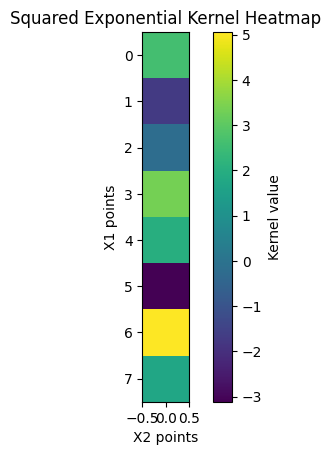

In [25]:
X1 = np.array([[-2.17], [1.99], [0.57], [-3.01], [-1.16], [3.30], [-4.85], [-0.86]])
X2 = np.array([[-1]])
s(50)
print("X1 shape:", X1.shape)
print("X1:", X1.T)
print("X2 shape:", X2.shape)
print("X2:", X2.T)
s(50)


length_scale = 1.0 / np.sqrt(2)  # Length scale for the kernel

K = squared_exponential_kernel_new(X1, X2, length_scale)


rlabel(f"Squared exponential kernel K= \n{np.array2string(K.T, precision=2)}")

s(50)
print("K shape:", K.shape)
print("K:", K.T)
s(50)


# plot K as a heatmap
plt.imshow(K, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Kernel value')
plt.title('Squared Exponential Kernel Heatmap')
plt.xlabel('X2 points')
plt.ylabel('X1 points')
plt.show()

In [21]:
X3 = np.array([[1, 2], 
               [3, 4]])

X4 = np.array([[5, 6], 
               [7, 8]])


K_ = squared_exponential_kernel_new(X3, X4, length_scale=1.0)

In [ ]:
print("X3 shape:", X3.shape)
print("X3:", X3.T)
print("X4 shape:", X4.shape)
print("X4:", X4.T)
s(50)

rlabel(f"Squared exponential kernel K= \n{K_.T}")
s(50)
print("K shape:", K_.shape)
print("K:", K_.T)

X3 shape: (2, 2)
X3: [[1 3]
 [2 4]]
X4 shape: (2, 2)
X4: [[5 7]
 [6 8]]
**************************************************


TypeError: unsupported format string passed to numpy.ndarray.__format__